# **Data Assassins** 
---
###**Spotify Regression Problem**

---



##**Summary**

>As streaming songs get ever-popular, music streaming service providers like Spotify and Apple Music deal with more enormous music data every day. This is where machine learning and deep learning come to play. Machine learning algorithms are already applied to produce recommended playlists based on listening preferences, and this is just the beginning of all that’s possible with artificial intelligence. Using the Spotify dataset, this assignment requires us to build a machine learning model to predict a song’s popularity. Our first task was to load the dataset and explore its many quirks through data analyses and visualisations. We performed data exploration and data cleaning in our data analysis section of this notebook. Then we tested out several models to observe and understand how they work and improve them. Then we settled on our final model, a stacking regressor, which provides us with the lowest RMSE values. The RMSE value offered by our model is 8.38, and the predictions made on Kaggle produced the RMSE of 9.22. we provide several suggestions in the end to improve our model.


#Spotify Regression Project

>Importing all the required packages like sklearn, pandas, matlab plot and numpy. 

In [64]:
# Import all needed packages
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Dataset Analysis

>The Spotify dataset provided to train the model contains 453 songs on the song title, artist, top genre, the year it was released, beats per minute, energy, danceability, loudness, liveness, valence, duration, acoustics, speech and popularity.

###Getting the data

>Load the dataset to the program using pandas data frame and count the number of rows in the dataset. This provided us with how many songs are contained within this dataset which is 453.

In [65]:
# load the data and count the number of instances
data = pd.read_csv('CS98XRegressionTrain.csv')
data.count()

Id           453
title        453
artist       453
top genre    438
year         453
bpm          453
nrgy         453
dnce         453
dB           453
live         453
val          453
dur          453
acous        453
spch         453
pop          453
dtype: int64

>We can use head() function to see some of the rows and understand the dataset

In [66]:
#shows the first 5 data to get an idea of the dataset
data.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


>info() function provides us with information like size, data frames and data types of each features.

In [67]:
# all features and its datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


###Statistical analysis
>The decribe() function provides us with information like mean, standard deviation, and quartiles.

In [68]:
# to view the statistical details of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,453.0,227.000000,130.914094,1.0,114.0,227.0,340.0,453.0
year,453.0,1991.443709,16.776103,1948.0,1976.0,1994.0,2007.0,2019.0
bpm,453.0,118.399558,25.238713,62.0,100.0,119.0,133.0,199.0
nrgy,453.0,60.070640,22.205284,7.0,43.0,63.0,78.0,100.0
dnce,453.0,59.565121,15.484458,18.0,49.0,61.0,70.0,96.0
dB,453.0,-8.836645,3.577187,-24.0,-11.0,-8.0,-6.0,-1.0
live,453.0,17.757174,13.830300,2.0,9.0,13.0,23.0,93.0
val,453.0,59.465784,24.539868,6.0,42.0,61.0,80.0,99.0
dur,453.0,226.278146,63.770380,98.0,181.0,223.0,262.0,511.0
acous,453.0,32.982340,29.530015,0.0,7.0,24.0,58.0,100.0


>The median is calculated for acoustics data and found to be 24. The 0 values of the acoustics data are replaced with 24

In [69]:
# to find median of the acous column
import math
median_acous = math.floor(data.acous.median())
median_acous

24

In [70]:
# replace the acous with 0 values with the found median value
data.acous = data.acous.replace(0,median_acous)

###Data visualisation
>Data visualisation is critical to understand the dataset and detect any outliers, errors etc. this is done using creating a histogram plot, box plot and linear correlation matrix.

####Histogram Plot
>The histogram is helpful to understand the distribution of the data as they are grouped into bins. We can observe that the live and speech are highly skewed to one region. We will perform normalisation later in this code.

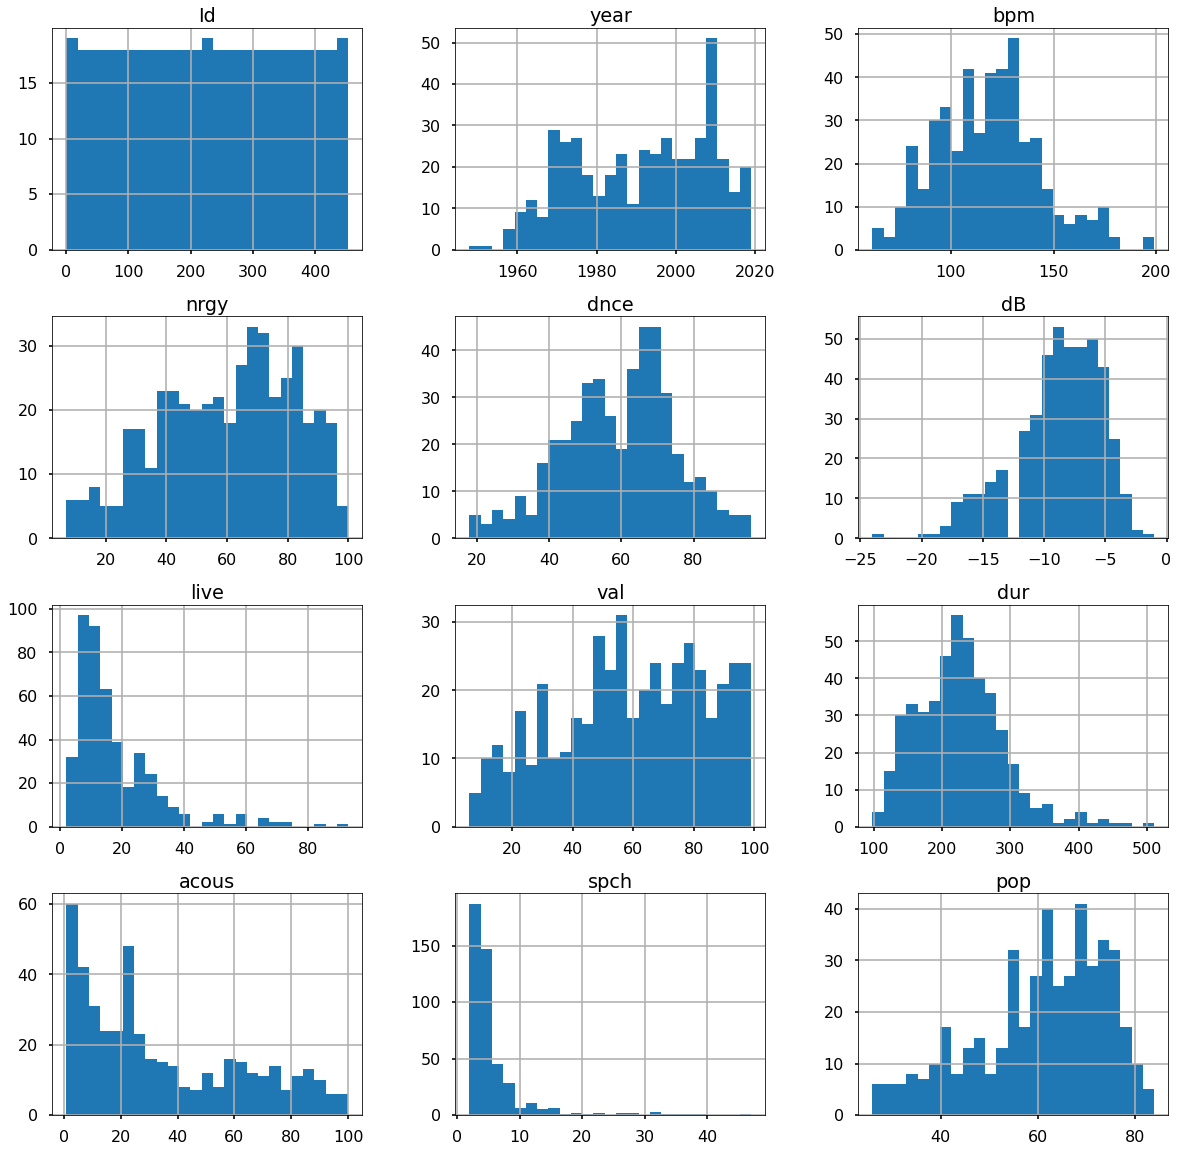

In [71]:
#Frequency distribution of elements in the dataset
import matplotlib.pyplot as plt
data.hist(bins=25, figsize=(20,20))
plt.show()

####Box Plot
>The Boxplot is used to observe how the data is distributed based on minimum, maximum and quartile calculations. The Seaborn package is used for creating the box plot.

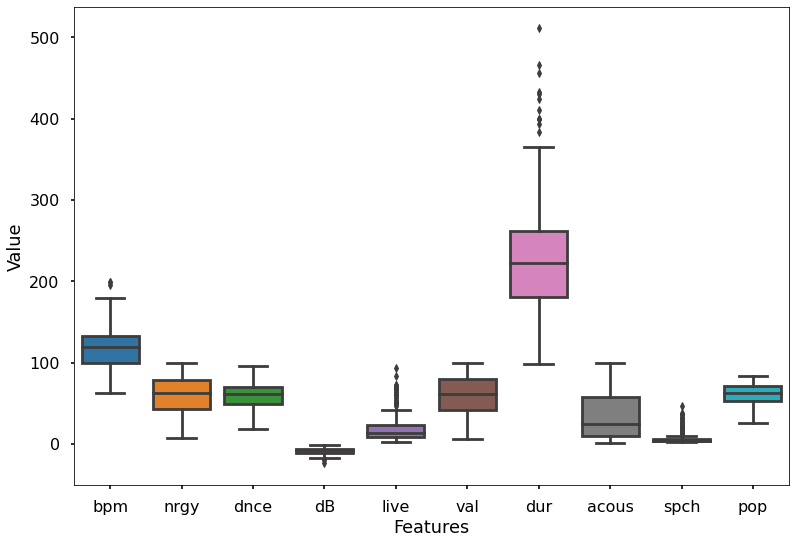

In [72]:
#Create a Box Plot of features in the dataset
import seaborn as sns 
%matplotlib inline
import matplotlib.style as style
style.use('seaborn-poster')
#style.use('ggplot')
sns.boxplot(data=data.drop(['Id','title', 'year','artist', 'top genre'], axis=1))
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

>>The distribution of features like speech and loudness seems to be very low. While the duration is most widely distributed.

####Linear Correlation Matrix
>The Linear Correlation Matrix is used to demonstrate a linear correlation between the dataset's features. We can observe the correlation between all the features. This is visualised using a heat map. The green blocks show a high correlation.

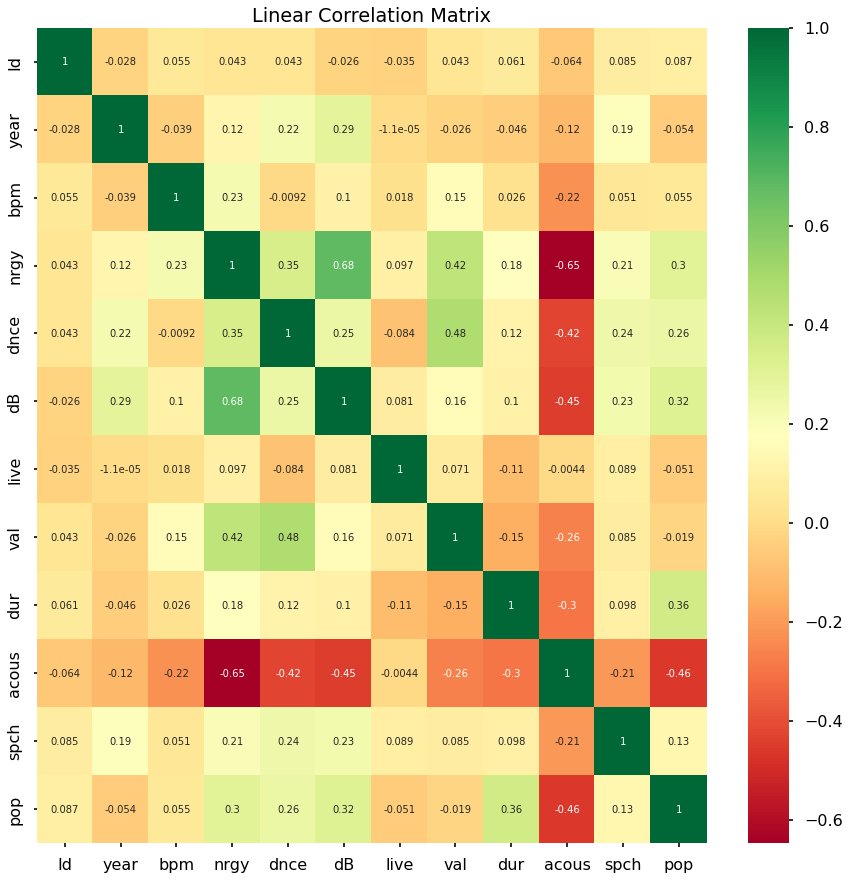

In [73]:
corrInx=data.corr()
top_corrInx=corrInx.index
plt.figure(figsize=(15,15))
plt.title('Linear Correlation Matrix')
sns.heatmap(data[top_corrInx].corr(), annot=True, cmap='RdYlGn')


>Some of the observations from the heatmap:


>>* Loudness and energy are highly correlated, which means the louder the song, the higher the energy.
*  Acoustics and energy seem to be highly inverse correlated, which means the higher the energy, the lower the acoustics.
*  Year and liveness seem to have a very low correlation.



###Outliers
>Outliers are instances with abnormal differnce to other values of the same group. This is identified from the get_outlier_counts() function and then the number of outliers are calulated.

In [74]:
from scipy import stats
import numpy as np
def get_outlier_counts(df, threshold):
    df = df.copy()
    
    # Get the z-score for specified threshold
    threshold_z_score = stats.norm.ppf(threshold)
    
    # Get the z-scores for each value in df
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    
    # Compare df z_scores to the threshold and return the count of outliers in each column
    return (z_score_df > threshold_z_score).sum(axis=0)

In [75]:
get_outlier_counts(data.drop(columns=['title','artist','Id','top genre']), 0.9999999)

year     0
bpm      0
nrgy     0
dnce     0
dB       0
live     1
val      0
dur      0
acous    0
spch     4
pop      0
dtype: int64

>>The dataset seems to have 1 'live' outlier and 4 'spch' outliers. Since there seems to be a relatively small number of outliers compared to the rest of the dataset, removing them may not produce a significant difference in accuracy score.

##Data Pre-processing

###Preparing the data
>The data is then seperated to input features like beats per minute, energy, danceability, loudness, liveness, valence, duration, acustics, speechiness, popularity and targeted feature which here is top genre.

In [76]:
# assign values to X & Y columns and get x_data (input features), y_data(targeted features)
x_cols = ['bpm','nrgy','dnce','dB','live','val','dur','spch','acous']
y_cols = ['pop']
x_data = data[x_cols]
y_data = data[y_cols].values.ravel()

###Scaling the features of the dataset
>The data is then scaled to normalise the data since they may vary widely. This is performed using Standard Scaler class.

In [77]:
# scale the x values to get better predicted value (The scaling normalize the data)
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x_data)

###Split and train model function
>The train_model() function here performs three things, test/train split, train the model, predict and return the accuracy score values of the predictions. The train set and test set separation are done 90/10 per cent, respectively. We tested our models with 80/20 and 70/30 split, but the 90/10 split consistently produced a better accuracy.

In [78]:
# split the existing sample data and fit it to training data for find RMSE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train_model(model, x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100, test_size=0.10)
  x_train.shape, x_test.shape
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print('RMSE :', np.sqrt(mean_squared_error(y_test,pred)))

##Select and Train Model

###Linear Regresion Model
>Linear Regression is based on **Supervised learning** and predicts the values considering independent variables. It's simple to implement and calculates output coefficients. But the main problem of this model is the assumption of linearity between the dependent and independent variables, and it is sensitive to outliers. Therefore, outliers need to be removed to train this model.

In [79]:
# To use LinearRegression libraries for RMSE with scaled data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_scaled, y_data)
train_model(model, x_scaled, y_data)

RMSE : 11.41745850071499


>>The linear regression model was the base model we trained to check how they performed with our dataset. The RMSE value came out to be 11.41. The RMSE value is high because the dataset is nonlinear and contain outliers.

###Support Vector Machine(Regressor) Model
>SVM is a **Supervised learning** algorithm and supports regression as well. It's a compelling model, even with high dimensional data. The advantage of SVM is that if the training data has more features than the number of rows, it performs well. The biggest issue with SVM is that it may not perform well on a large dataset. The regressor will also underperform when the dataset is noisy and overlaps the target classes. 

In [80]:
# To use SVR library for RMSE scaled data
from sklearn.svm import SVR
svr_model = SVR(kernel="poly", degree=1, C=100, epsilon=0.1)
svr_model.fit(x_scaled, y_data)
train_model(svr_model, x_scaled,y_data)

RMSE : 11.737709859674228


>> After performing Hyperparameter tuning to our support vector regressor on parameters like kernel, degree and C., we got the lowest RMSE score with a Polynomial kernel with a degree 1 and c =100. The trained model produced the average RMSE score of 11.74. There is still more room for improvement.

###Random Forest Regressor Model
>Random Forest Regressor uses a bagging algorithm, and it is based on the ensemble Learning technique. It creates many trees on a subset of training data and combines the output of all the trees to make a prediction. Also, it effectively handles missing values and is robust to controlling outliers automatically. The disadvantage of this model is that it needs much more computational power and resources. Compared to a decision tree, a random forest regressor is a much more time consuming when the number of trees increases.

In [81]:
# To use RandomForestRegressor library for RMSE scaled data
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_scaled, y_data)
train_model(rf_model, x_scaled, y_data)

RMSE : 10.115067001003139


>>When we initially trained the model, we immediately got a lower RMSE than the previous models. Our mean RMSE was 11.56. To improve our model, we performed hyperparameter tuning on the n_estimators parameter. We finally landed with n_estimators=100 producing the lowest RMSE values.


###Bagging with Decision Tree Regressor Model
>Bagging is based on an ensemble learning algorithm. We used Decision Tree Regressor for bagging and produced a better-predicted value. The advantage of the model is that it avoids over-fitting while also performing well on a high dimensional dataset. The missing values do not affect the performance of this algorithm. Though the decision tree classifier may not produce a better prediction, the final prediction from the bagging classifier is much better.


In [82]:
# Using ensemble learning method with BaggingRegressor model 
from sklearn import ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
ensemble = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                            n_estimators=100, # number of base estimators in ensemble
                            max_samples=0.5,  # 50% of samples taken from existing instances
                            max_features=1.0, # 100% of features are taken
                            bootstrap_features=False, # it represent samples taken without feature replacement
                            random_state=0)
ensemble.fit(x_scaled, y_data)
train_model(ensemble, x_scaled, y_data)

RMSE : 9.858062248958861


>>We made Decision Tree Regressor the base estimator because it is faster than Random Forest. We performed hyperparameter tuning for n_estimators and max samples. The lowest RMSE value was produced when n_estimators was 100. this helped us achieve maximum predictions as possible. Also, max_samples were set to 0.5 as we want 50% of samples to be taken from existing instances. Max_features as 1.0 as 100% of features are required for our prediction and having bootstrap as false to perform pasting. The average RMSE value our model produced is 9.85.

###Our Final Model
>Stacking is an ensemble learning model which contains several base models and the predictions of these models and fed into blender or meta learner. This final regressor takes inputs from the base regressors and makes a final prediction. Our model consists of a Decision Tree Regressor and a Bagging Regressor with Random Forest Regressor as the final estimator. 

In [87]:
# Using ensemble learning method with StackingRegressor model
from sklearn.ensemble import StackingRegressor
# Using DecisionTreeRegressor & BaggingRegressor model for initial predictions on stacking
estimatorsList = [
                  ('dt', DecisionTreeRegressor(min_samples_leaf=9)),
                  ('bg', BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                          n_estimators=100,
                                          max_samples=0.5,
                                          max_features=1.0,
                                          bootstrap_features=False,
                                          random_state=20))
                  ]
# Using RandomForestRegressor as final estimator to train a generalized model
sr_model = StackingRegressor(estimators=estimatorsList,
                             final_estimator=RandomForestRegressor(n_estimators=100, random_state=20))
sr_model.fit(x_scaled, y_data)
train_model(sr_model, x_scaled, y_data)            


RMSE : 8.374449487999383


>> As mentioned above, our final model consists of a bagging regressor and decision tree regressor as the base estimators and random forest as our final estimator. We already performed hyperparameter tuning for bagging regressor in one of our previous models. We performed hyper-parameter tuning for random forest regressor using grid search and found that the n_estimator = 100 is the model that produced the lowest RMSE value. 

>>We chose stacking as our final model because it combines our better performing models and produces an overall better model to predict the target value. This is evident in our RMSE score = 8.3844, which is the lowest we achieved. Our model does not reach an even lower RMSE score because decision trees can be ineffective when regression on continuous values. Since the dataset is small and noisy, decision trees often become unstable and make poor predictions. It's also time-consuming and can get complex. 

>>Our model performs better when training with an RMSE value of 8.3844, but when we uploaded our predictions to Kaggle, our RMSE Value was 9.22, which is higher than our score obtained while training. This is possibly due to the overfitting of the training data. Our model does not produce the best solution, but we can significantly improve with further optimising our model. 



##Conclusion
>>We can further improve the model by only using highly correlated features with our target (top genre). This can be done when the dataset is more extensive, and the instances in the dataset are distributed evenly. We can perform more data analysis and data cleaning to get a lower RMSE score. Another suggestion is to use different classifiers for stacking that serve better. We can also perform multi-layer stacking to get an even more accurate prediction. In the end, We learned to perform end to end machine learning, and in future, we would like to explore neural networks as a possible solution to accomplish this regression task. 


##Appendix: Loading the prediction to the test file

In [84]:
# Load the test file
test = pd.read_csv("CS98XRegressionTest.csv")
test_copy = test.copy() # Create copy file to retain the original dataset
test_copy.drop(['Id','title','artist','top genre','year'], axis=1, inplace=True)
test_scaled = std_scaler.fit_transform(test_copy) # fit the test_copy

#using StackingRegressor model because it gives lowest RMSE value which is RMSE : 8.374449487999383
pred = sr_model.predict(test_scaled)  
pred_round = pred.astype(int)
test['pop'] = pred_round  # round the value of predicted pop
#Note: CS98XRegressionTest.csv.csv has to be added for each test run
test.to_csv("CS98XRegressionTest.csv") # load the final predicted pop into original test file
test.head(5)

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18,65
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3,60
2,456,We Are The Champions - Remastered 2011,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3,58
3,457,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4,61
4,458,This Eve of Parting,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3,44
